In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
# Last inn dataene
cancer = load_breast_cancer(as_frame=True)

In [3]:
X_data = cancer["data"]
X_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y_data = cancer["target"]
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [5]:
X_data.shape

(569, 30)

In [6]:
cols = X_data.columns

# legg til støy i størrelsesorden = standardavvik * 2 for hver egenskap
X_data[cols] += np.random.normal(scale=X_data[cols].std() * 2, size=(X_data.shape[0], X_data.shape[1]))

C:\Users\Bjorn\AppData\Local\Temp\ipykernel_6088\1357929660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_data[cols] += np.random.normal(scale=X_data[cols].std() * 2, size=(X_data.shape[0], X_data.shape[1]))


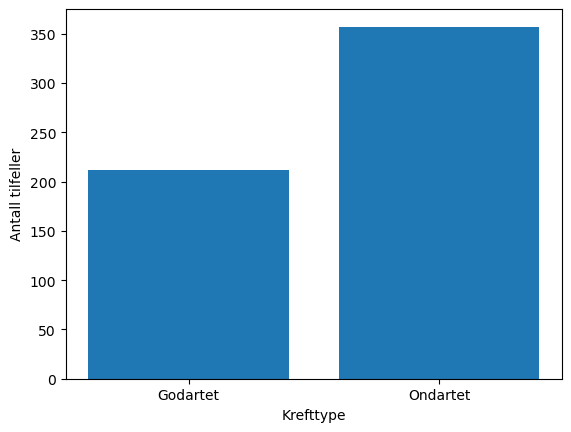

In [7]:
plt.bar(x=np.unique(y_data, return_counts=True)[0], height= np.unique(y_data, return_counts=True)[1])
plt.xticks([0,1],["Godartet", "Ondartet"])
plt.xlabel("Krefttype")
plt.ylabel("Antall tilfeller")
plt.savefig("unbalanced.png")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,recall_score,precision_score, classification_report, roc_curve, roc_auc_score

In [10]:
logreg = LogisticRegression(solver='lbfgs',max_iter=5000)
logreg.fit(X_train, y_train)
y_test_hat = logreg.predict_proba(X_test)[:,1]

C:\Users\Bjorn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
print("Nøyaktighet = ",accuracy_score(y_test,(y_test_hat>0.5)*1).round(2))
print("F1-score = ",f1_score(y_test,(y_test_hat>0.5)*1).round(2))
print("Sensitivitet = ",recall_score(y_test,(y_test_hat>0.5)*1,pos_label=1).round(2))
print("Spesifisitet = ",recall_score(y_test,(y_test_hat>0.5)*1,pos_label=0).round(2))
print("Presisjon = ",precision_score(y_test,(y_test_hat>0.5)*1).round(2))

Nøyaktighet =  0.9
F1-score =  0.92
Sensitivitet =  0.93
Spesifisitet =  0.85
Presisjon =  0.91


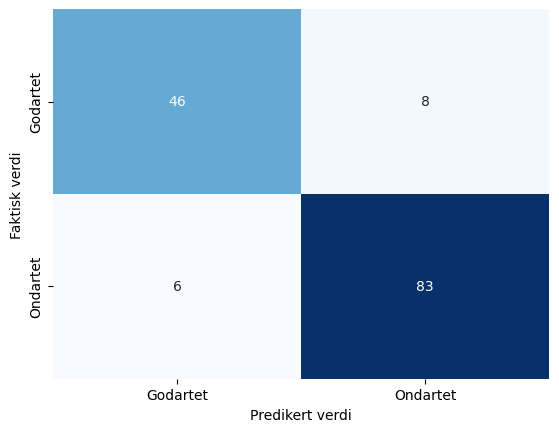

In [12]:
sns.heatmap(confusion_matrix(y_test,(y_test_hat>0.5)*1), annot=True, cbar=False, cmap="Blues")
plt.ylabel("Faktisk verdi")
plt.xlabel("Predikert verdi")
plt.xticks([0.5,1.5],["Godartet", "Ondartet"])
plt.yticks([0.5,1.5],["Godartet", "Ondartet"])
plt.show()

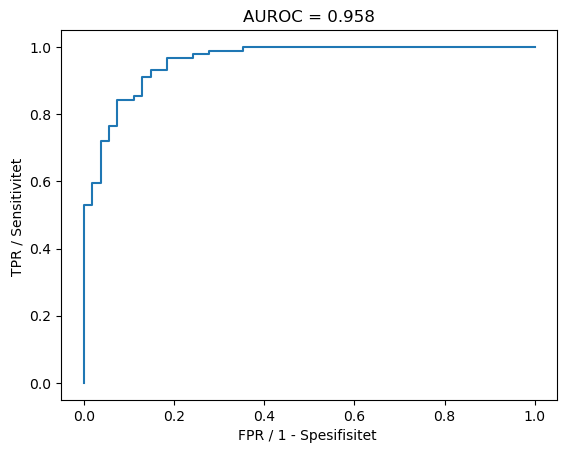

In [13]:
fpr, tpr, _ = roc_curve(y_test,y_test_hat)
plt.plot(fpr,tpr)
plt.title("AUROC = {}".format(roc_auc_score(y_test,y_test_hat).round(3)) )
plt.xlabel("FPR / 1 - Spesifisitet ")
plt.ylabel("TPR / Sensitivitet ")
plt.show()

In [24]:
fpr[7]

0.05555555555555555

In [23]:
tpr

array([0.        , 0.01123596, 0.52808989, 0.52808989, 0.59550562,
       0.59550562, 0.71910112, 0.71910112, 0.76404494, 0.76404494,
       0.84269663, 0.84269663, 0.85393258, 0.85393258, 0.91011236,
       0.91011236, 0.93258427, 0.93258427, 0.96629213, 0.96629213,
       0.97752809, 0.97752809, 0.98876404, 0.98876404, 1.        ,
       1.        ])

In [25]:
threshold[7]

0.7743934835615794

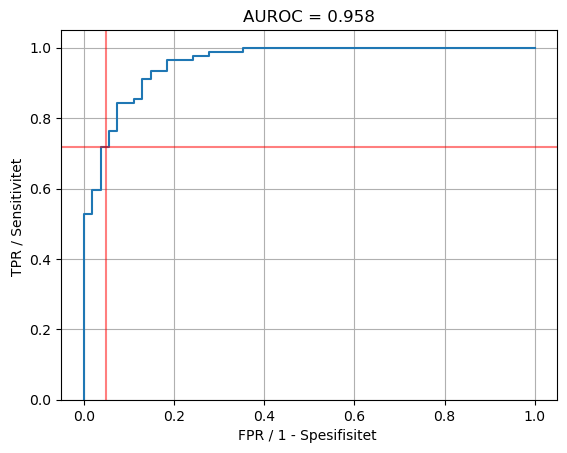

Prediksjonsterskel =  0.774


In [14]:
# Krav: False positiv rate = 0.05
fpr, tpr, threshold = roc_curve(y_test,y_test_hat)
plt.plot(fpr,tpr)
plt.title("AUROC = {}".format(roc_auc_score(y_test,y_test_hat).round(3)) )
plt.xlabel("FPR / 1 - Spesifisitet ")
plt.ylabel("TPR / Sensitivitet ")

plt.vlines(0.05,ymin=-0.05,ymax=1.1, color="red", alpha=0.5)
plt.hlines(tpr[np.where(fpr>0.05)[0][0]], xmin=-0.1, xmax=1.1, color="red", alpha=0.5)
plt.ylim(0,1.05)
plt.xlim(-0.05,1.05)
plt.grid()
plt.show()

ny_prediksjonsterskel = threshold[np.where(fpr>0.05)[0][0]].round(3)
print("Prediksjonsterskel = ", ny_prediksjonsterskel)

In [15]:
threshold[np.where(fpr>0.05)[0][0]]

0.7743934835615794

In [16]:
print("Nøyaktighet = ",accuracy_score(y_test,(y_test_hat>ny_prediksjonsterskel)*1).round(2))
print("F1-score = ",f1_score(y_test,(y_test_hat>ny_prediksjonsterskel)*1).round(2))
print("Sensitivitet = ",recall_score(y_test,(y_test_hat>ny_prediksjonsterskel)*1,pos_label=1).round(2))
print("Spesifisitet = ",recall_score(y_test,(y_test_hat>ny_prediksjonsterskel)*1,pos_label=0).round(2))
print("Presisjon = ",precision_score(y_test,(y_test_hat>ny_prediksjonsterskel)*1).round(2))

Nøyaktighet =  0.8
F1-score =  0.82
Sensitivitet =  0.72
Spesifisitet =  0.94
Presisjon =  0.96


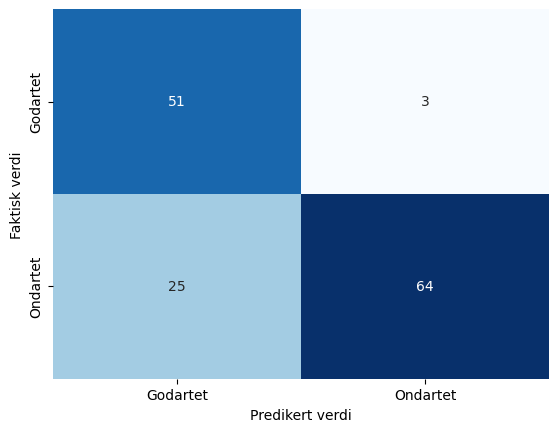

In [17]:
sns.heatmap(confusion_matrix(y_test,(y_test_hat>ny_prediksjonsterskel)*1), annot=True, cbar=False, cmap="Blues")
plt.ylabel("Faktisk verdi")
plt.xlabel("Predikert verdi")
plt.xticks([0.5,1.5],["Godartet", "Ondartet"])
plt.yticks([0.5,1.5],["Godartet", "Ondartet"])
plt.show()